In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Data Extraction

In [20]:

df = pd.read_csv("GTEx_Analysis_2022-06-06_v10_RNASeQCv2.4.2_gene_median_tpm.gct", 
                 sep="\t", 
                 skiprows=2)

In [21]:
df.head()

,Name,Description,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,...,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.167751,0.00000,0.0000,0.00000,0.00000
1,ENSG00000227232.5,WASH7P,3.99789,3.17815,2.67308,4.0708,3.87547,3.62625,5.05094,1.45902,...,6.04259,3.04117,3.32897,2.87374,4.08568,4.542470,6.31791,7.0687,5.74187,2.89503
2,ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.0000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.054907,0.00000,0.0000,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.0000,0.00000,0.00000


In [22]:
df

,Name,Description,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,...,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,DDX11L1,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.167751,0.000000,0.000000,0.000000,0.00000
1,ENSG00000227232.5,WASH7P,3.99789,3.178150,2.673080,4.0708,3.87547,3.62625,5.05094,1.45902,...,6.042590,3.041170,3.328970,2.87374,4.085680,4.542470,6.317910,7.068700,5.741870,2.89503
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.054907,0.000000,0.000000,0.000000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59028,ENSG00000198695.2,MT-ND6,3479.95000,3605.240000,6229.830000,5961.1400,5014.48000,4577.12000,8343.99000,8470.01000,...,5918.860000,9394.920000,11078.200000,12877.20000,17030.600000,1708.290000,2400.350000,3595.070000,2202.710000,1056.52000
59029,ENSG00000210194.1,MT-TE,9.66208,8.599950,14.677800,18.6770,14.34600,14.35710,22.70730,21.15200,...,21.565200,27.461000,32.890000,44.00160,53.812900,2.324410,4.455020,8.768250,4.251670,3.13967
59030,ENSG00000198727.2,MT-CYB,23813.90000,25381.700000,28928.900000,13013.2000,16380.50000,13177.00000,23353.90000,32337.60000,...,12416.800000,27364.200000,22252.700000,31359.20000,26006.300000,15641.200000,19502.900000,15390.600000,12679.100000,2520.98000
59031,ENSG00000210195.2,MT-TT,0.00000,0.511427,0.653953,0.0000,0.00000,0.00000,0.00000,1.33336,...,0.621433,0.522499,0.424497,1.31027,0.703076,0.000000,0.000000,0.000000,0.000000,0.00000


## Data Exploration

In [23]:
df.describe()

,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,...,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
count,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,...,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000,59033.000000
mean,15.867902,15.500027,16.091329,15.906867,15.453773,15.949575,15.769695,16.344877,16.320470,16.349150,...,15.692724,14.407754,16.130839,16.218647,16.296739,16.471177,15.708390,15.786882,14.943380,14.221661
std,371.077874,398.247059,579.914609,216.320358,258.407922,241.904501,371.696520,790.908098,738.785743,751.394649,...,300.161993,497.151439,549.631265,659.674466,435.558707,359.884479,331.405171,248.316769,243.413496,940.299058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.019567,0.019238,0.002632,0.000000,0.013133,0.000000,0.036564,0.006393,0.018889,0.022052,...,0.043025,0.006673,0.021834,0.000000,0.000000,0.531315,0.057156,0.034024,0.041281,0.000000
75%,1.614470,1.493070,1.175230,1.671800,1.733320,1.418480,1.936820,1.103460,1.246620,1.282520,...,2.240630,1.312460,1.424820,0.937090,1.386140,5.573060,2.742690,2.305990,2.242470,0.426736
max,35474.200000,37952.400000,59138.500000,17946.700000,22545.400000,21559.900000,36919.800000,90885.100000,78526.300000,76389.000000,...,28853.800000,44834.800000,55994.500000,62203.600000,40807.800000,35760.500000,36086.800000,23227.100000,21477.500000,207194.000000


In [24]:
df.dtypes

Name                         object
Description                  object
Adipose_Subcutaneous        float64
Adipose_Visceral_Omentum    float64
Adrenal_Gland               float64
                             ...   
Testis                      float64
Thyroid                     float64
Uterus                      float64
Vagina                      float64
Whole_Blood                 float64
Length: 70, dtype: object

In [30]:
plt.hist(df)
plt.xlim(0, 1000)     # x-axis: expression values from 0 to 50
plt.ylim(0, 60000)   
plt.xlabel('Frequency')
plt.ylabel('Values')
plt.title('Histogram of Column')
plt.show()


KeyboardInterrupt



In [27]:
print(df['Adipose_Subcutaneous'])

0            0.00000
1            3.99789
2            0.00000
3            0.00000
4            0.00000
            ...     
59028     3479.95000
59029        9.66208
59030    23813.90000
59031        0.00000
59032        1.27003
Name: Adipose_Subcutaneous, Length: 59033, dtype: float64


In [36]:
zero_count = (df['Adipose_Subcutaneous']==0.0).sum()
nonzero_count = (df['Adipose_Subcutaneous'] != 0.0).sum()

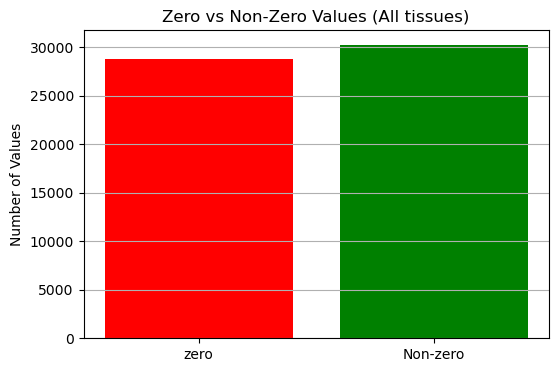

In [41]:
plt.figure(figsize=(6, 4))
plt.bar(['zero', 'Non-zero'], [zero_count, nonzero_count], color=['red', 'green'])

plt.title("Zero vs Non-Zero Values (All tissues)")
plt.ylabel("Number of Values")
plt.grid(axis='y')
plt.show()

C:\Users\goyel\AppData\Local\Temp\ipykernel_3872\2593735201.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


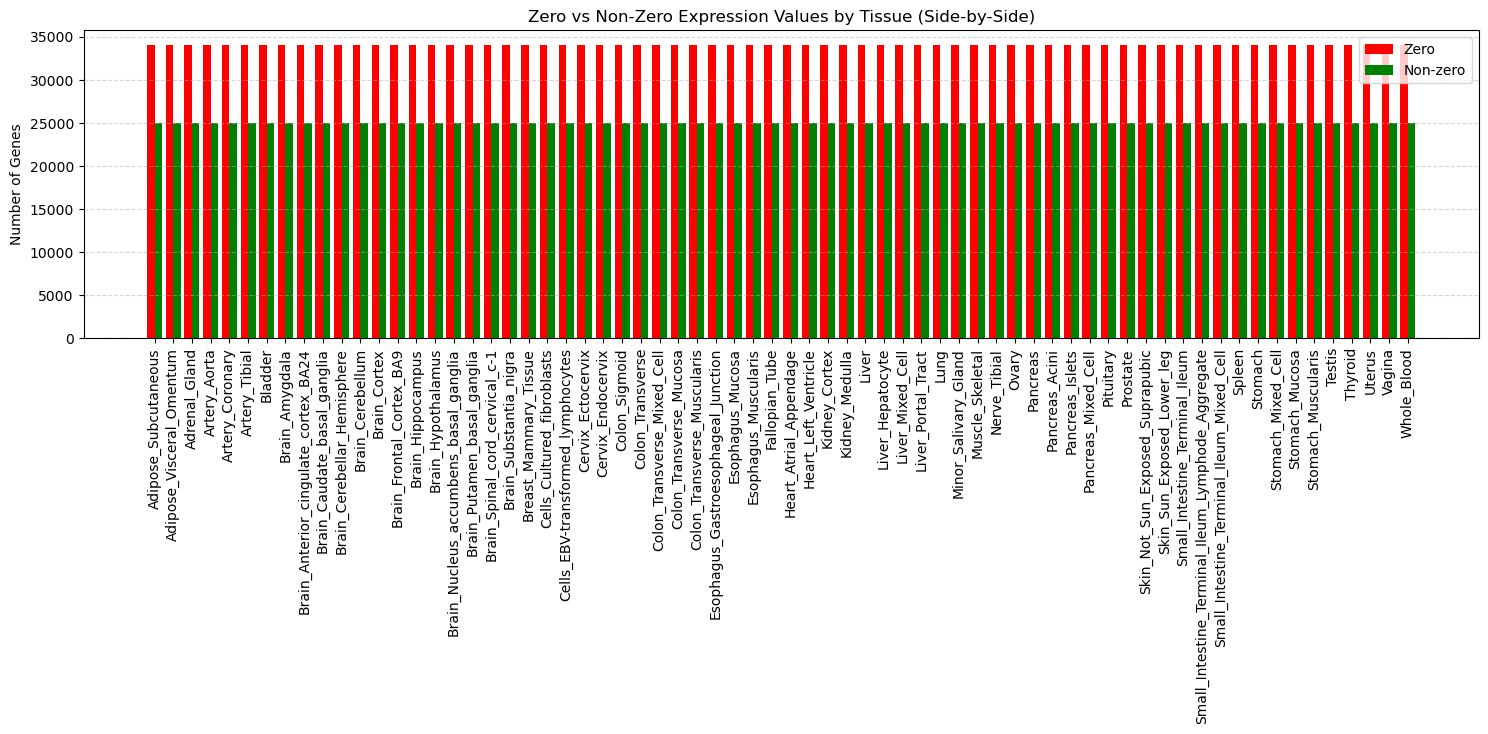

In [128]:
expr = df.iloc[:, 2:]
# .drop(columns=['Name', 'Description'])
tissues = expr.columns

zero_counts = [(expr[tissue]==0.0).sum() for col in tissues]
nonzero_counts = [(expr[tissue] != 0.0).sum() for col in tissues]

x = np.arange(len(tissues))
width = 0.4

plt.figure(figsize=(18, 4))
plt.bar(x - width/2, zero_counts, width, label = 'Zero', color='red')
plt.bar(x + width/2, nonzero_counts, width, label = 'Non-zero', color='green')

# Axis formatting
plt.xticks(x, tissues, rotation=90)
plt.ylabel("Number of Genes")
plt.title("Zero vs Non-Zero Expression Values by Tissue (Side-by-Side)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


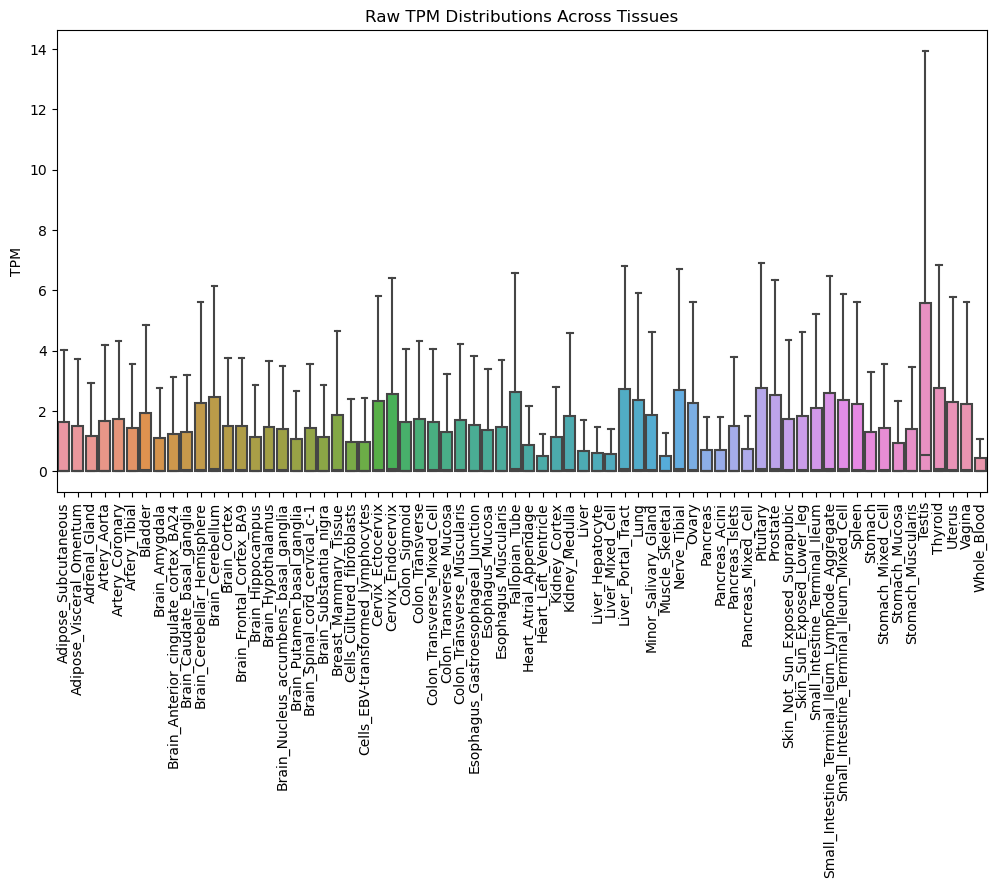

In [129]:
# Sample 10 tissues to plot
sampled_cols = df.columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[sampled_cols], showfliers=False)
plt.xticks(rotation=90)
plt.title("Raw TPM Distributions Across Tissues")
plt.ylabel("TPM")
plt.show()

## Data Normalisation

In [130]:
df_expr_log = np.log2(expr + 1)

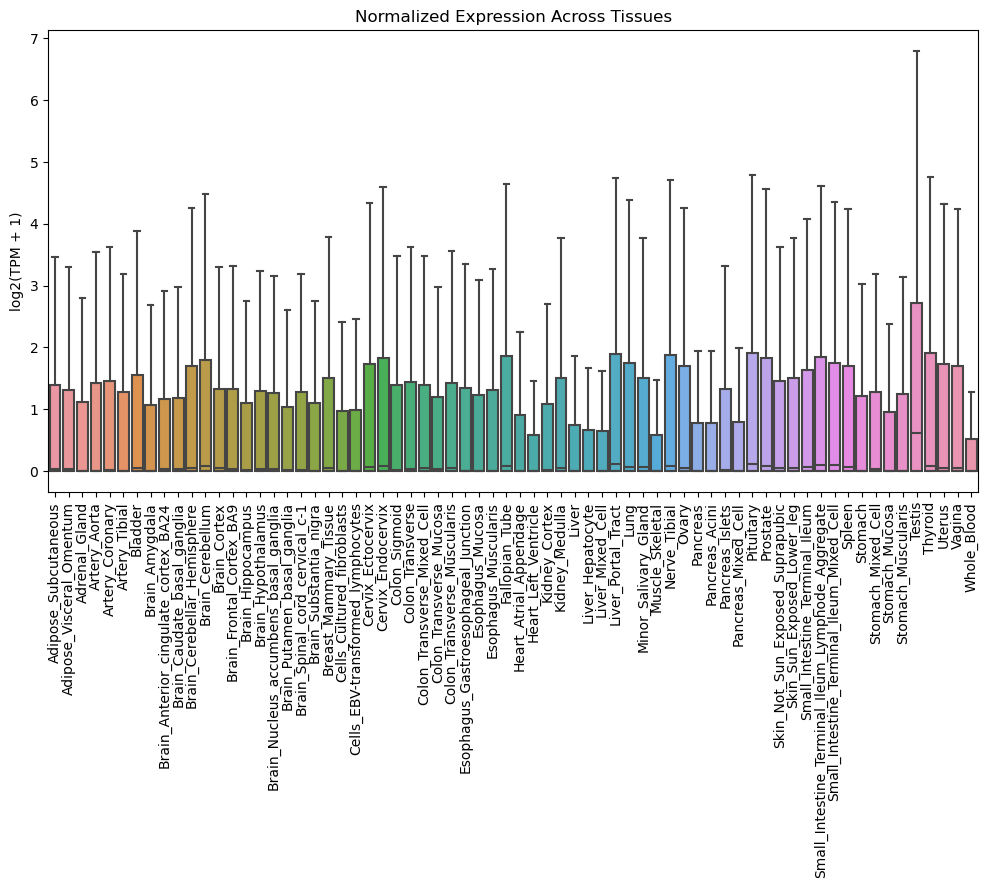

In [131]:
sampled_cols = df_expr_log.columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_expr_log[sampled_cols], showfliers=False)
plt.xticks(rotation=90)
plt.ylabel("log2(TPM + 1)")
plt.title("Normalized Expression Across Tissues")
plt.show()

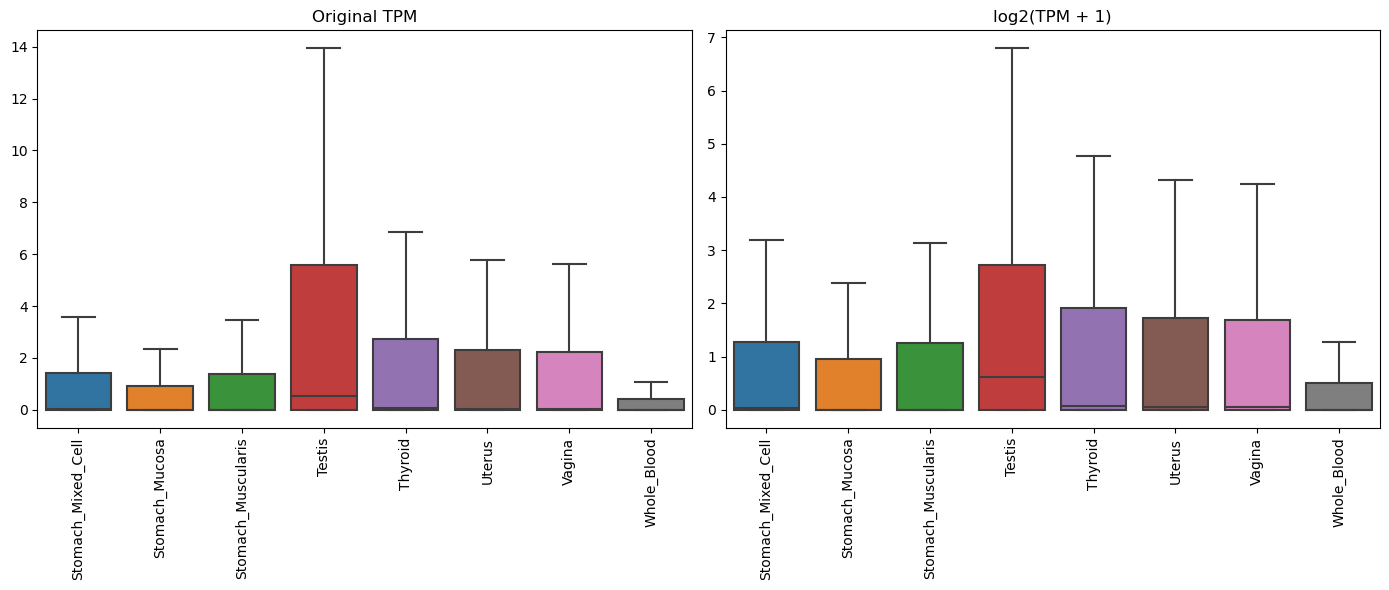

In [132]:
sampled = expr.columns[60:]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[sampled], showfliers=False)
plt.title("Original TPM")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_expr_log[sampled], showfliers=False)
plt.title("log2(TPM + 1)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

C:\Users\goyel\AppData\Local\Temp\ipykernel_3872\3203466685.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


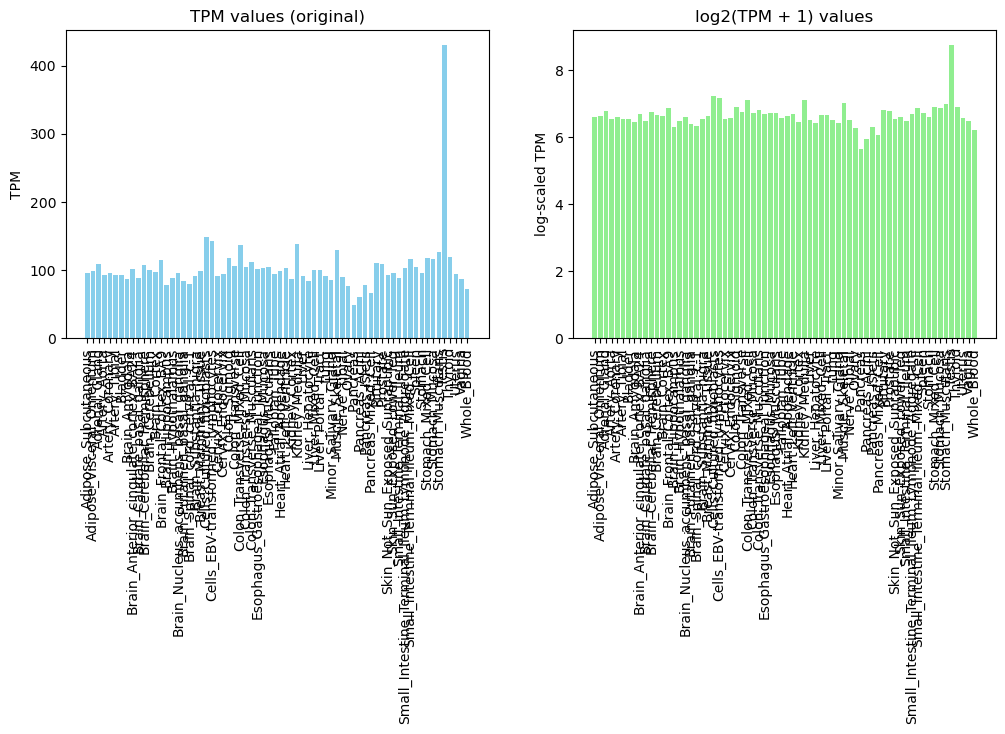

In [133]:
gene_id = df['Name'][100]  # pick a gene by index or name

# Plot expression of that gene
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(expr.columns, expr.loc[100], color='skyblue')
plt.xticks(rotation=90)
plt.title("TPM values (original)")
plt.ylabel("TPM")

plt.subplot(1, 2, 2)
plt.bar(expr.columns, df_expr_log.loc[100], color='lightgreen')
plt.xticks(rotation=90)
plt.title("log2(TPM + 1) values")
plt.ylabel("log-scaled TPM")

plt.tight_layout()
plt.show()

In [134]:
gene_info = df[['Name', 'Description']]
df_expr_log = np.log2(df.iloc[:, 2:] + 1)
df_expr_log_full = pd.concat([gene_info, df_expr_log], axis=1)

## With this data I am trying to find tissue-specific genes.

### Max TPM per gene -> dominant tissue

#### My idea was to find the tissue where it has the highest expression, then asses of th's much higher than in others

In [137]:
df_expr = df_expr_log_full.set_index('Description')

In [138]:
df_numeric = df_expr.select_dtypes(include=['number'])

In [139]:
gene_max_tissue = df_numeric.idxmax(axis=1)

In [140]:
gene_max_value = df_numeric.max(axis=1)

In [141]:
gene_second_max = df_numeric.apply(lambda x: sorted(x, reverse=True)[1], axis=1)

In [142]:
specificity_score = gene_max_value / (gene_second_max + 1e-6)

In [147]:
print(gene_max_tissue)

Description
DDX11L1                                   Testis
WASH7P                                    Uterus
MIR6859-1                   Adipose_Subcutaneous
MIR1302-2HG          Colon_Transverse_Mixed_Cell
FAM138A                  Colon_Transverse_Mucosa
                             ...                
MT-ND6                        Stomach_Muscularis
MT-TE                         Stomach_Muscularis
MT-CYB                      Heart_Left_Ventricle
MT-TT          Cells_EBV-transformed_lymphocytes
MT-TP                    Colon_Transverse_Mucosa
Length: 59033, dtype: object


In [148]:
result = pd.DataFrame({
    'gene': gene_max_tissue.index,
    'max_tissue': gene_max_tissue.values,
    'max_value': gene_max_value,
    'specificity_score': specificity_score
})

In [151]:
genes_by_tissue = result.groupby('max_tissue')['gene'].apply(list)
genes_by_tissue

max_tissue
Adipose_Subcutaneous        [MIR6859-1, RNU6-1100P, ENSG00000241599, MIR68...
Adipose_Visceral_Omentum    [RBP7, AADACL4, PDPN, SH3GLB1, HMGB3P10, HSD3B...
Adrenal_Gland               [FNDC10, UTS2, FAM43B, MTFR1L, LINC01778, SDC3...
Artery_Aorta                [PRDM16, ENSG00000226286, ENSG00000272235, ENS...
Artery_Coronary             [PLA2G2A, HEYL, ENSG00000225903, ST6GALNAC5, E...
                                                  ...                        
Testis                      [DDX11L1, ENSG00000238009, ENSG00000239906, DD...
Thyroid                     [SSU72, ENSG00000236045, RAP1GAP, ZNF436-AS1, ...
Uterus                      [WASH7P, INTS11, ENSG00000240731, ENSG00000234...
Vagina                      [RSC1A1, RNU6ATAC27P, EDN2, ATP6V0CP4, ENSG000...
Whole_Blood                 [CICP27, ENSG00000268903, ENSG00000269981, ENS...
Name: gene, Length: 68, dtype: object

In [150]:
genes_by_tissue_dict = genes_by_tissue.to_dict()


In [152]:
print(genes_by_tissue['Testis'])  # list of genes highest expressed in Liver


['DDX11L1', 'ENSG00000238009', 'ENSG00000239906', 'DDX11L17', 'RPL23AP24', 'ENSG00000237094', 'ENSG00000230021', 'ENSG00000228327', 'LINC01409', 'ENSG00000230092', 'ENSG00000272438', 'KLHL17', 'C1orf159', 'ENSG00000285812', 'TTLL10-AS1', 'TTLL10', 'UBE2J2', 'LINC01786', 'SCNN1D', 'CPTP', 'AURKAIP1', 'ENSG00000284740', 'ENSG00000215014', 'CDK11B', 'ENSG00000231050', 'CFAP74', 'ENSG00000226969', 'ENSG00000271806', 'PEX10', 'MMEL1', 'MMEL1-AS1', 'TTC34', 'ENSG00000285945', 'ENSG00000283259', 'ENSG00000233234', 'ENSG00000287396', 'ENSG00000231630', 'ACTRT2', 'CCDC27', 'SMIM1', 'RN7SL574P', 'ENSG00000272153', 'LINC01134', 'LINC01345', 'LINC02780', 'LINC01777', 'ENSG00000227169', 'LINC01646', 'ENSG00000284739', 'LINC02781', 'LINC02782', 'ENSG00000284616', 'ENSG00000284692', 'ENSG00000284666', 'ENSG00000260972', 'LINC00337', 'HES3', 'ENSG00000271746', 'ESPN', 'ENSG00000231868', 'TAS1R1', 'ZBTB48', 'PHF13', 'LINC01672', 'CAMTA1-IT1', 'CAMTA1-AS2', 'ENSG00000238290', 'ENSG00000232848', 'RERE-AS

In [153]:
df_expr_log_full['Testis']

0         0.223733
1         2.470529
2         0.000000
3         0.077116
4         0.000000
           ...    
59028    10.739181
59029     1.733098
59030    13.933156
59031     0.000000
59032     0.943569
Name: Testis, Length: 59033, dtype: float64

In [163]:
filtered = df[df["Description"] == "ENSG00000239906"][['Name', 'Description', 'Testis']]
print(filtered)

                 Name      Description    Testis
12  ENSG00000239906.1  ENSG00000239906  0.188475
